# Zomato Data Analysis Project

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv("../Data/Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [102]:
df.shape

(148, 7)

In [103]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [104]:
df = df.rename(columns={"name":"restaurant_name","rate":"rating","listed_in(type)":"restaurant_type"})

In [105]:
df.isnull().sum()

restaurant_name                0
online_order                   0
book_table                     0
rating                         0
votes                          0
approx_cost(for two people)    0
restaurant_type                0
dtype: int64

In [106]:
df.duplicated().sum()

0

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   restaurant_name              148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rating                       148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   restaurant_type              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [108]:
df['rating'] = df['rating'].str.split('/').str[0].astype(float)

In [109]:
df

,restaurant_name,online_order,book_table,rating,votes,approx_cost(for two people),restaurant_type
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   restaurant_name              148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rating                       148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   restaurant_type              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


<Axes: >

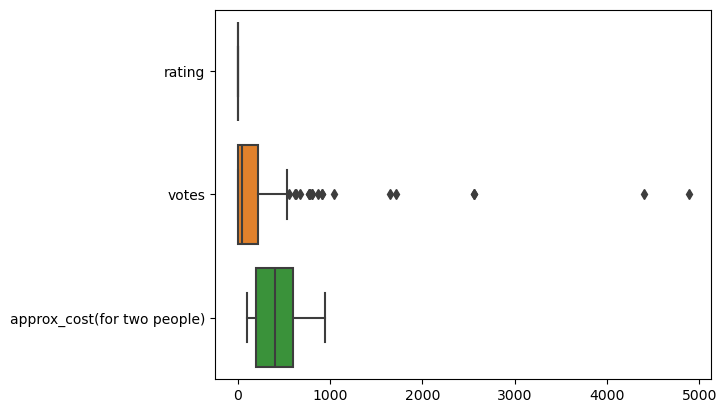

In [149]:
sns.boxplot(df, orient="h")

## 1. What type of restaurant do the majority of customers order from?

<Axes: xlabel='restaurant_type', ylabel='count'>

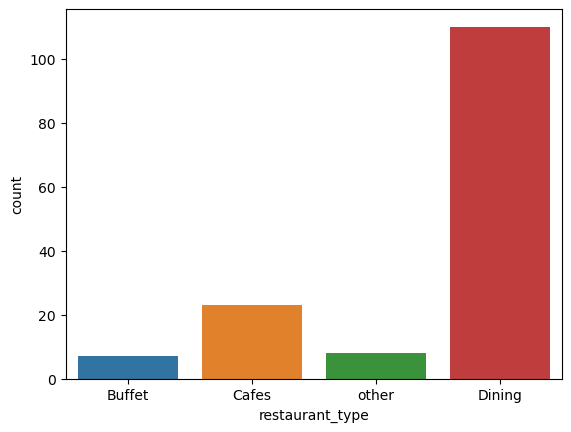

In [116]:
sns.countplot(df, x= df["restaurant_type"])

In [113]:
df["restaurant_type"].value_counts()

restaurant_type
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

### 2. How many votes has each type of restaurant received from customers?

In [145]:
votes_per_restaurants = df.groupby("restaurant_type")["votes"].sum()
votes_per_restaurants

restaurant_type
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

Text(0.5, 1.0, 'Total Votes per Restaurants')

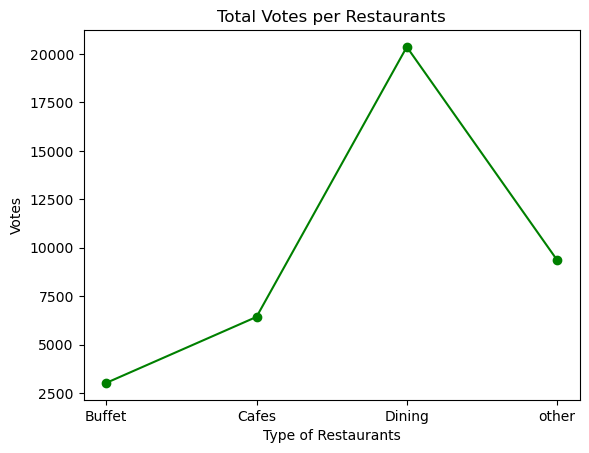

In [146]:
plt.plot(votes_per_restaurants, color='green', marker='o')
plt.xlabel("Type of Restaurants")
plt.ylabel("Votes")
plt.title("Total Votes per Restaurants")

**Conclutation:** *Dining restaurant has received maximum votes. Total votes of this restaturant is 20363*

### 3. What are the ratings that the majority of restaurants have received?

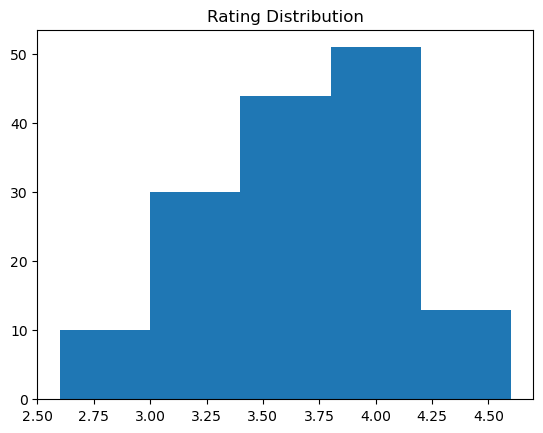

In [134]:
plt.hist(df["rating"], bins=5)
plt.title("Rating Distribution")
plt.show()

**Conclusion :** *The majority of restaurants received ratings from 3.5 to 4*

### 4. Zomato has observed that most couples order most of their food online. What is their average spending on each order?

In [137]:
couples_data = df["approx_cost(for two people)"].value_counts()
couples_data.head()

approx_cost(for two people)
300    23
200    16
150    16
400    15
500    14
Name: count, dtype: int64

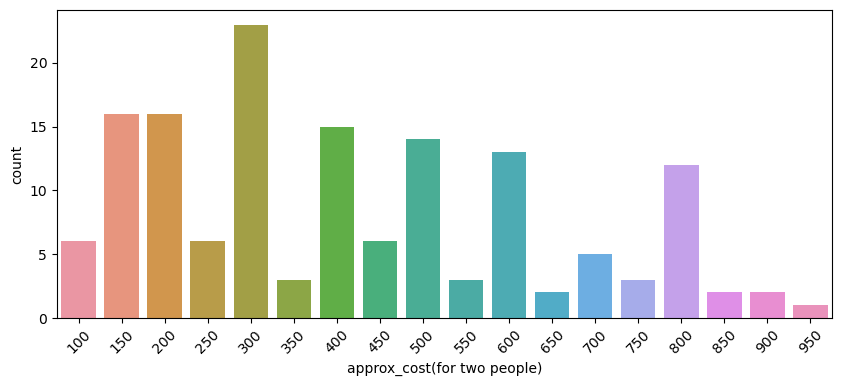

In [144]:
plt.figure(figsize=(10,4))
sns.countplot(x=df["approx_cost(for two people)"])
plt.xticks(rotation=45)
plt.show()

**Conclusion :** *The majority of couples prefer restaurants with an approximate cost of 300 rupees*

### 5. Which mode (online or offline) has received the maximum rating?

<Axes: xlabel='online_order', ylabel='rating'>

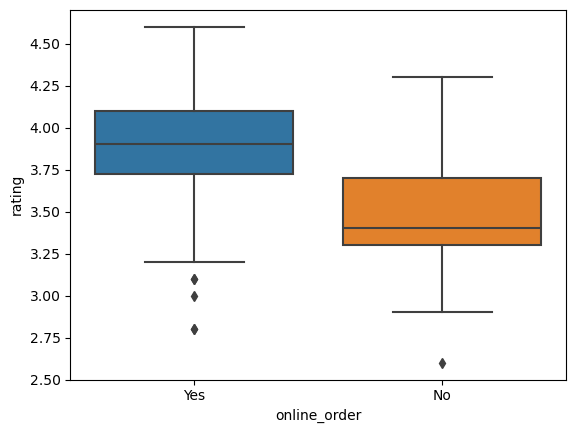

In [147]:
sns.boxplot(x = "online_order", y = "rating", data=df)

**Conclusion :** *Offline order received lower rating in comparison to online order*

***